In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


In [2]:
df=pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.duplicated().sum()

0

**Data visualization**

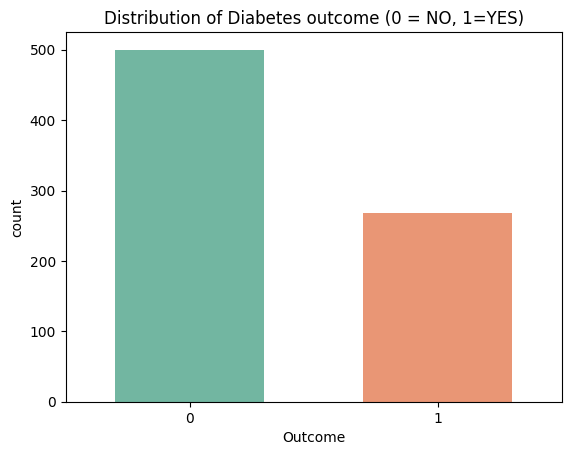

In [9]:
sns.countplot(x='Outcome',data=df,palette='Set2',width=0.6)
plt.title('Distribution of Diabetes outcome (0 = NO, 1=YES)')
plt.show()

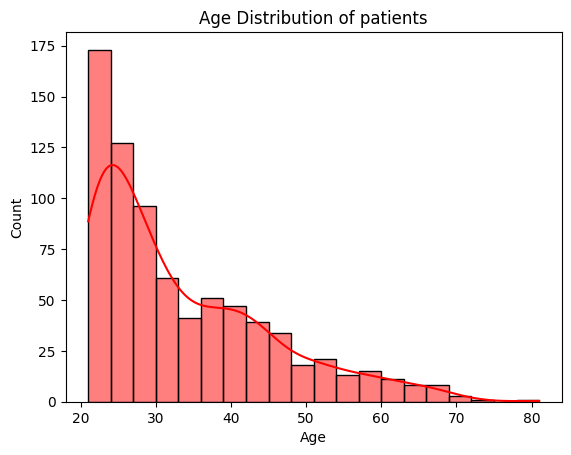

In [10]:
import warnings 
warnings.filterwarnings('ignore')
sns.histplot(df['Age'],bins=20,kde=True,color='red')
plt.title('Age Distribution of patients')
plt.show()

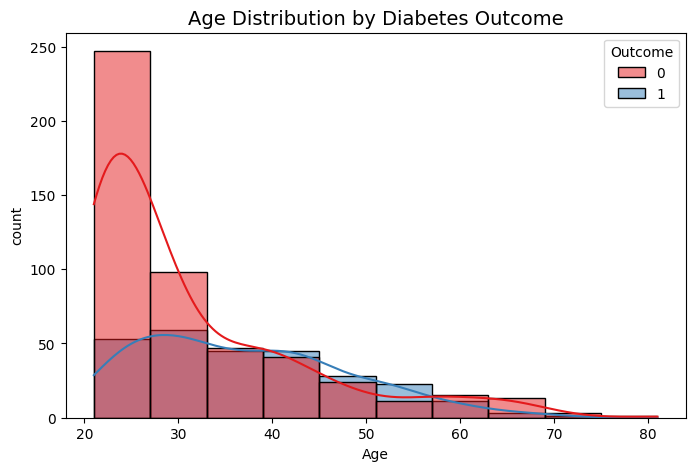

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='Age',bins=10,kde=True,hue='Outcome',palette='Set1')
plt.title('Age Distribution by Diabetes Outcome', fontsize=14)
plt.xlabel('Age')
plt.ylabel('count')
plt.show()


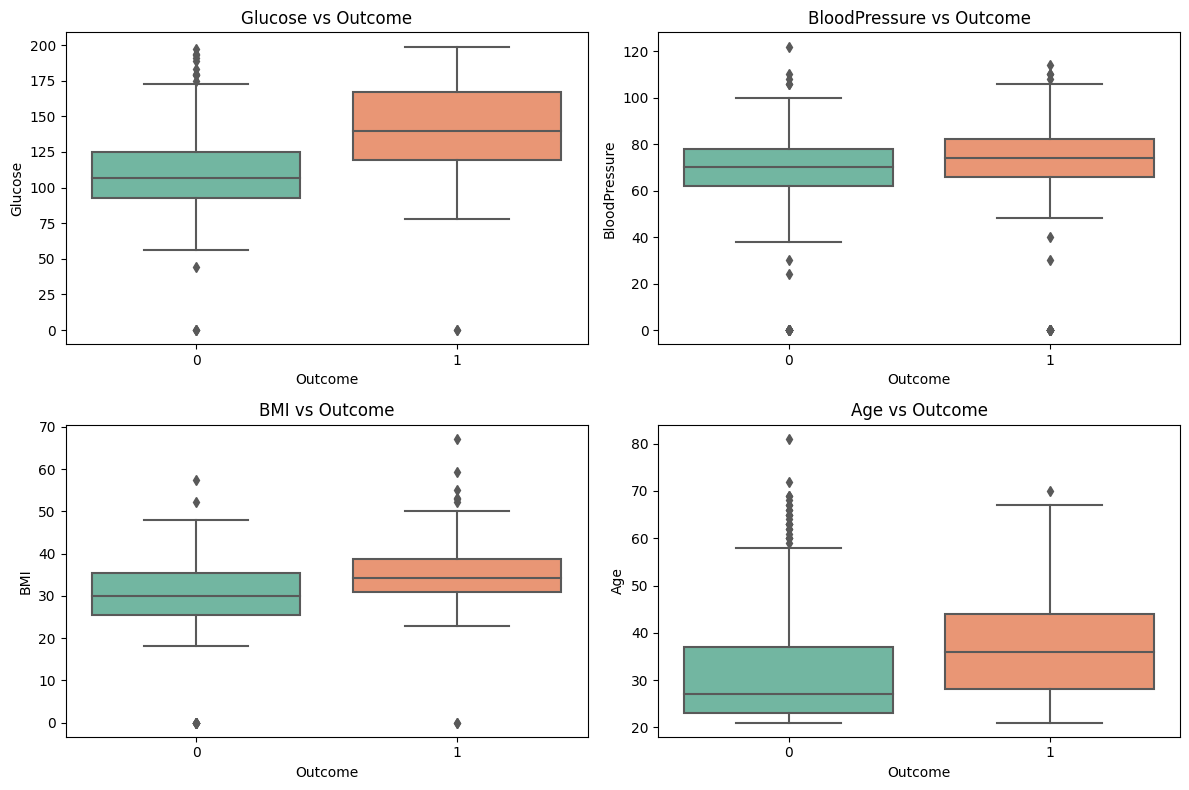

In [12]:
plt.figure(figsize=(12,8))
for i, col in enumerate(['Glucose', 'BloodPressure', 'BMI', 'Age'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Outcome', y=col, palette='Set2')
    plt.title(f'{col} vs Outcome')
plt.tight_layout()
plt.show()


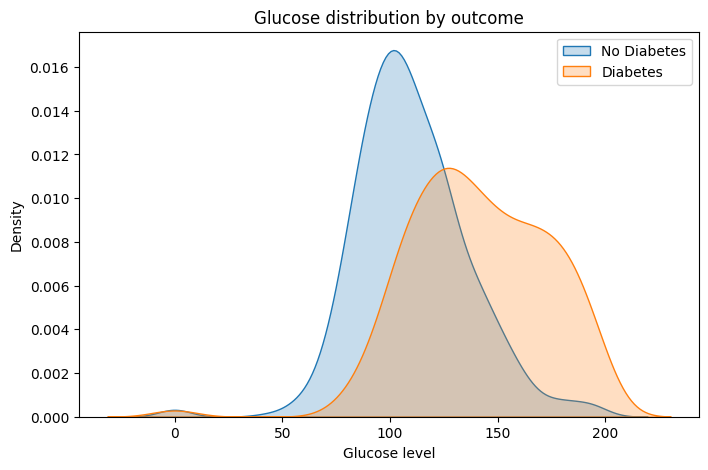

In [13]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Outcome']==0]['Glucose'],shade=True,label='No Diabetes')
sns.kdeplot(data=df[df['Outcome']==1]['Glucose'], shade=True, label='Diabetes')
plt.title('Glucose distribution by outcome')
plt.xlabel('Glucose level')
plt.ylabel('Density')
plt.legend()
plt.show()

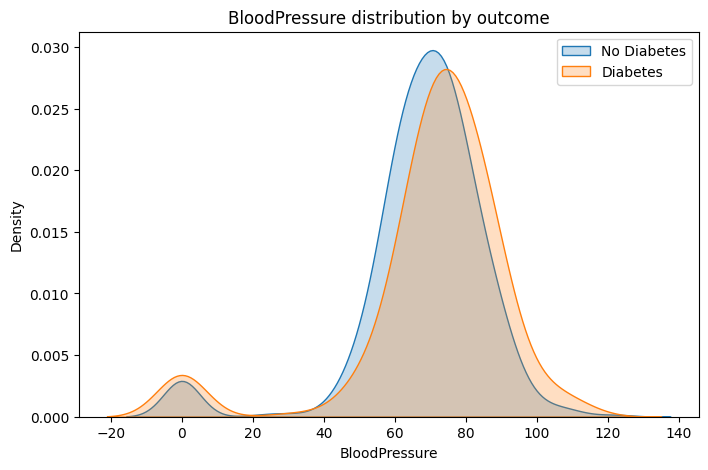

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Outcome']==0]['BloodPressure'],shade=True,label='No Diabetes')
sns.kdeplot(data=df[df['Outcome']==1]['BloodPressure'], shade=True, label='Diabetes')
plt.title('BloodPressure distribution by outcome')
plt.xlabel('BloodPressure')
plt.ylabel('Density')
plt.legend()
plt.show()

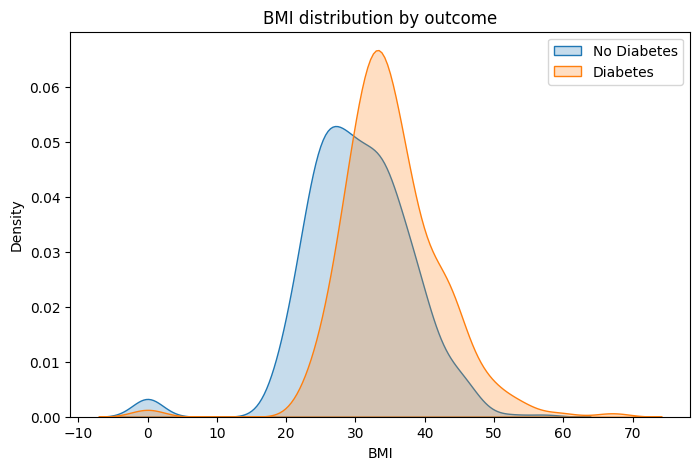

In [15]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Outcome']==0]['BMI'],shade=True,label='No Diabetes')
sns.kdeplot(data=df[df['Outcome']==1]['BMI'], shade=True, label='Diabetes')
plt.title('BMI distribution by outcome')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.show()

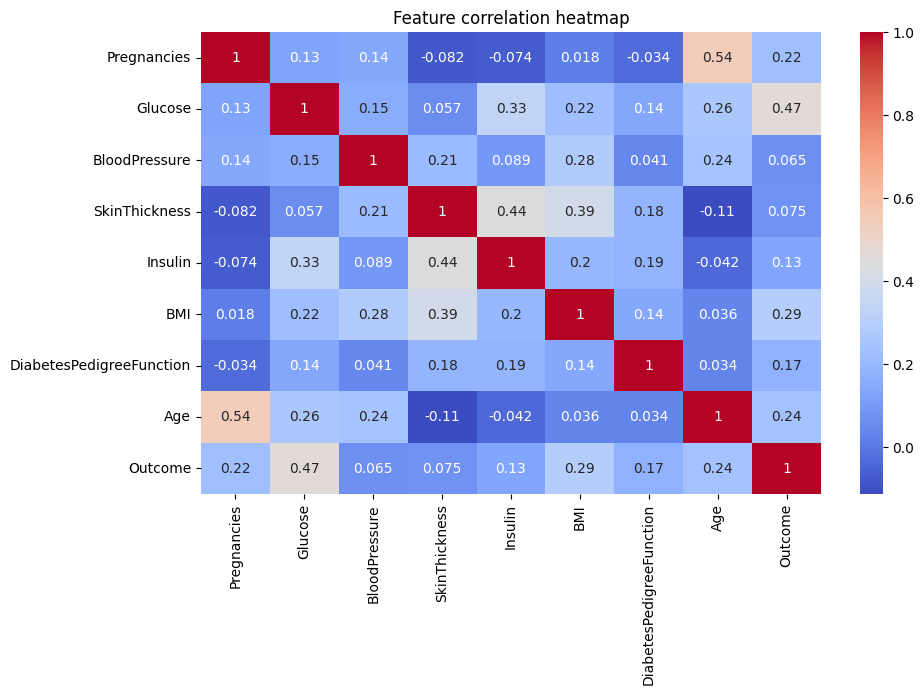

In [16]:
plt.figure(figsize=(10,6))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2g')
plt.title('Feature correlation heatmap')
plt.show()

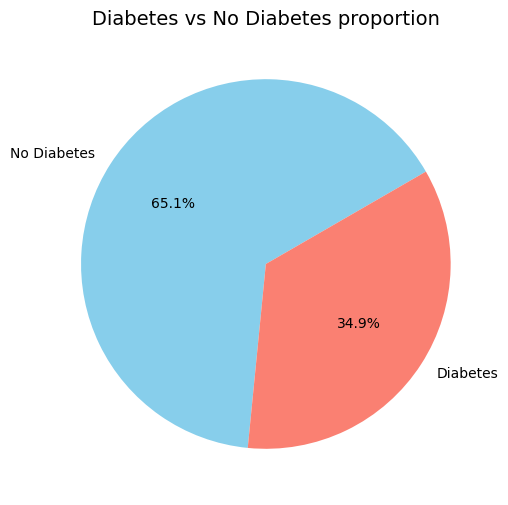

In [17]:
outcome_counts=df['Outcome'].value_counts()

#plot pie chart 
plt.figure(figsize=(6,6))
plt.pie(outcome_counts,labels=['No Diabetes', 'Diabetes'],autopct='%1.1f%%',colors=['skyblue','salmon'],startangle=30)
plt.title('Diabetes vs No Diabetes proportion',fontsize=14)
plt.show()

In [18]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

**Scaling data**

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

**Model-1: Logistic Regression**

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',C=1.0,class_weight='balanced',random_state=42)
lr.fit(x_train_scaled,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
y_pred_train=lr.predict(x_train_scaled)
y_pred_test=lr.predict(x_test_scaled)

print('Train accuracy:',accuracy_score(y_train,y_pred_train))
print('Test accuracy:',accuracy_score(y_test,y_pred_test))


print('Train accuracy:',classification_report(y_train,y_pred_train))
print('Test accuracy:',classification_report(y_test,y_pred_test))


Train accuracy: 0.760586319218241
Test accuracy: 0.7142857142857143
Train accuracy:               precision    recall  f1-score   support

           0       0.85      0.77      0.81       401
           1       0.63      0.74      0.68       213

    accuracy                           0.76       614
   macro avg       0.74      0.76      0.74       614
weighted avg       0.77      0.76      0.76       614

Test accuracy:               precision    recall  f1-score   support

           0       0.82      0.72      0.76        99
           1       0.58      0.71      0.64        55

    accuracy                           0.71       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



**MODEL-2:SVC**

In [25]:
from sklearn.svm import SVC

In [26]:
svc=SVC(kernel='rbf',C=0.5,gamma='scale',random_state=42, probability=True)
svc.fit(x_train_scaled,y_train)

SVC(C=0.5, probability=True, random_state=42)

In [27]:
y_pred_train=svc.predict(x_train_scaled)
y_pred_test=svc.predict(x_test_scaled)

print('Train accuracy:',accuracy_score(y_train,y_pred_train))
print('Test accuracy:',accuracy_score(y_test,y_pred_test))


print('Train accuracy:',classification_report(y_train,y_pred_train))
print('Test accuracy:',classification_report(y_test,y_pred_test))


Train accuracy: 0.8143322475570033
Test accuracy: 0.7727272727272727
Train accuracy:               precision    recall  f1-score   support

           0       0.82      0.92      0.87       401
           1       0.80      0.62      0.70       213

    accuracy                           0.81       614
   macro avg       0.81      0.77      0.78       614
weighted avg       0.81      0.81      0.81       614

Test accuracy:               precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=4,min_samples_split=5,min_samples_leaf=4,random_state=42,class_weight='balanced')
rf.fit(x_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=4,
                       min_samples_split=5, random_state=42)

In [29]:
y_pred_train=rf.predict(x_train_scaled)
y_pred_test=rf.predict(x_test_scaled)

print('Train accuracy:',accuracy_score(y_train,y_pred_train))
print('Test accuracy:',accuracy_score(y_test,y_pred_test))


print('Train accuracy:',classification_report(y_train,y_pred_train))
print('Test accuracy:',classification_report(y_test,y_pred_test))


Train accuracy: 0.8257328990228013
Test accuracy: 0.7467532467532467
Train accuracy:               precision    recall  f1-score   support

           0       0.92      0.81      0.86       401
           1       0.70      0.86      0.77       213

    accuracy                           0.83       614
   macro avg       0.81      0.83      0.82       614
weighted avg       0.84      0.83      0.83       614

Test accuracy:               precision    recall  f1-score   support

           0       0.84      0.75      0.79        99
           1       0.62      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.76      0.75      0.75       154



In [30]:
from xgboost import XGBClassifier

In [31]:
xgb=XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=100)
xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred_train=xgb.predict(x_train_scaled)
y_pred_test=xgb.predict(x_test_scaled)

print('Train accuracy:',accuracy_score(y_train,y_pred_train))
print('Test accuracy:',accuracy_score(y_test,y_pred_test))


print('Train accuracy:',classification_report(y_train,y_pred_train))
print('Test accuracy:',classification_report(y_test,y_pred_test))


Train accuracy: 0.8501628664495114
Test accuracy: 0.7597402597402597
Train accuracy:               precision    recall  f1-score   support

           0       0.87      0.91      0.89       401
           1       0.82      0.73      0.77       213

    accuracy                           0.85       614
   macro avg       0.84      0.82      0.83       614
weighted avg       0.85      0.85      0.85       614

Test accuracy:               precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [33]:
normal_BMI=df[(df['Outcome']==0) ]['BMI'].unique()
diabetic_BMI=df[(df['Outcome']==1) ]['BMI'].unique()

print('Normal_bmi:',normal_BMI)
print('Diabetic_bmi',diabetic_BMI)

Normal_bmi: [26.6 28.1 25.6 35.3 37.6 27.1 43.3 39.3 35.4 23.2 22.2 34.1 36.  24.8
 19.9 27.6 24.  33.2 34.  40.2 22.7 27.4 29.7 28.   0.  19.4 24.2 24.4
 34.7 23.  46.8 40.5 41.5 25.  25.4 29.  42.7 19.6 28.9 28.6 35.1 32.
 24.7 32.6 37.7 22.4 29.3 24.6 32.4 36.6 38.5 26.5 19.1 46.7 33.9 31.6
 20.4 28.7 26.1 22.5 39.6 29.5 34.3 31.2 33.7 28.2 34.2 33.6 26.8 42.9
 33.3 38.3 21.1 33.8 30.8 36.9 39.5 32.5 32.8 30.5 27.3 37.4 21.9 40.6
 25.2 37.2 44.2 29.6 31.9 28.4 43.5 45.  34.9 27.7 22.6 33.1 24.3 31.
 40.1 23.9 42.8 30.  28.8 23.6 34.6 35.7 36.7 45.2 35.  18.4 29.2 38.2
 52.3 30.1 35.8 25.9 30.9 32.1 40.  25.1 27.8 24.9 25.3 35.9 26.  38.7
 20.8 36.1 35.5 30.7 21.  39.7 26.2 39.4 19.3 38.1 27.5 23.1 32.7 47.9
 36.8 23.5 21.8 42.2 34.4 27.2 29.8 39.2 36.2 43.4 20.  22.3 23.7 22.1
 42.1 42.4 18.2 45.3 30.4 24.5 29.9 32.2 36.5 21.2 39.9 37.8 26.7 30.2
 46.1 41.3 38.8 23.8 35.2 40.7 46.5 33.5 37.3 26.3 21.7 36.3 28.5 25.5
 46.2 26.9 38.6 31.3 27.  19.5 25.8 20.1 38.4 40.8 34.5 26.4 38.9 3

In [34]:
normal_age=df[(df['Outcome']==0) ]['Age'].unique()
diabetic_age=df[(df['Outcome']==1) ]['Age'].unique()

print('Normal_age:',normal_age)
print('Diabetic_age',diabetic_age)

Normal_age: [31 21 30 29 57 33 27 50 22 38 60 28 45 35 26 37 48 40 24 42 44 36 32 54
 25 23 41 34 69 39 55 65 47 61 63 43 52 51 58 46 49 72 62 81 59 67 66 64
 68 56 53]
Diabetic_age [50 32 33 26 53 54 34 59 51 31 41 29 43 28 46 27 56 25 58 39 42 38 37 60
 24 61 23 40 62 30 36 47 57 52 21 66 22 49 44 35 67 45 55 70 48]


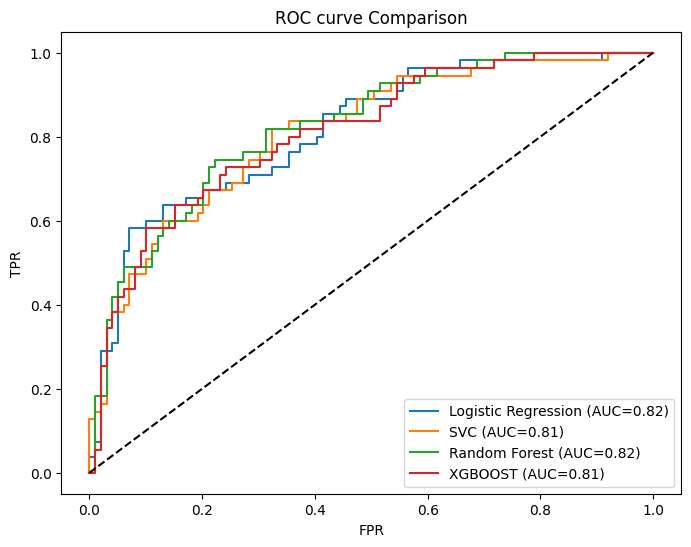

In [35]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve,auc

#put your model as a dictionary 
models={

         'Logistic Regression': lr,
         'SVC':svc,
         'Random Forest':rf,
         'XGBOOST':xgb


}
plt.figure(figsize=(8,6))

for name,model in models.items():
    y_prob=model.predict_proba(x_test_scaled)[:,-1]  
    fpr,tpr,_=roc_curve(y_test,y_prob)
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label='{} (AUC={:.2f})'.format(name,roc_auc))

#Random line for chance 
plt.plot([0,1],[0,1],'k--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Comparison')
plt.legend()
plt.show()